# Football NLP conversational model

In this notebook I will go throught the code used to create a football chatbot. The technologies used for this arhitecture are: 
- Python
- Google Cloud
  - Google Dialogflow API
  - Google Translate API

--- 
### Libraries

In [ ]:
!pip install gradio
!pip install google-cloud-dialogflow
!pip install google-cloud-translate==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.3.0
    Uninstalling cachetools-5.3.0:
      Successfully uninstalled cachetools-5.3.0
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.17.3
    Uninstalling google-auth-2.17.3:
      Successfully uninstalled google-auth-2.17.3
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.11.0
    Uninstalling google-api-core-2.11.0:
      Successfully uninstalled google-api-core-2.11.0
  Attempting uninstall: google-cloud-core
    Found existing installation: google-cloud-core 2.3.2
    Uninstalling google-cl

In [ ]:
# Dialogflow API
from google.cloud import dialogflow
import uuid

In [ ]:
# Translate API
from google.cloud import translate_v2 as translate

---
### Conversational Model in Dialogflow
The first MVP of the chatbot will be done in the Google Cloud Platform. Here are some screenshot of the work done in the GCP platform: 
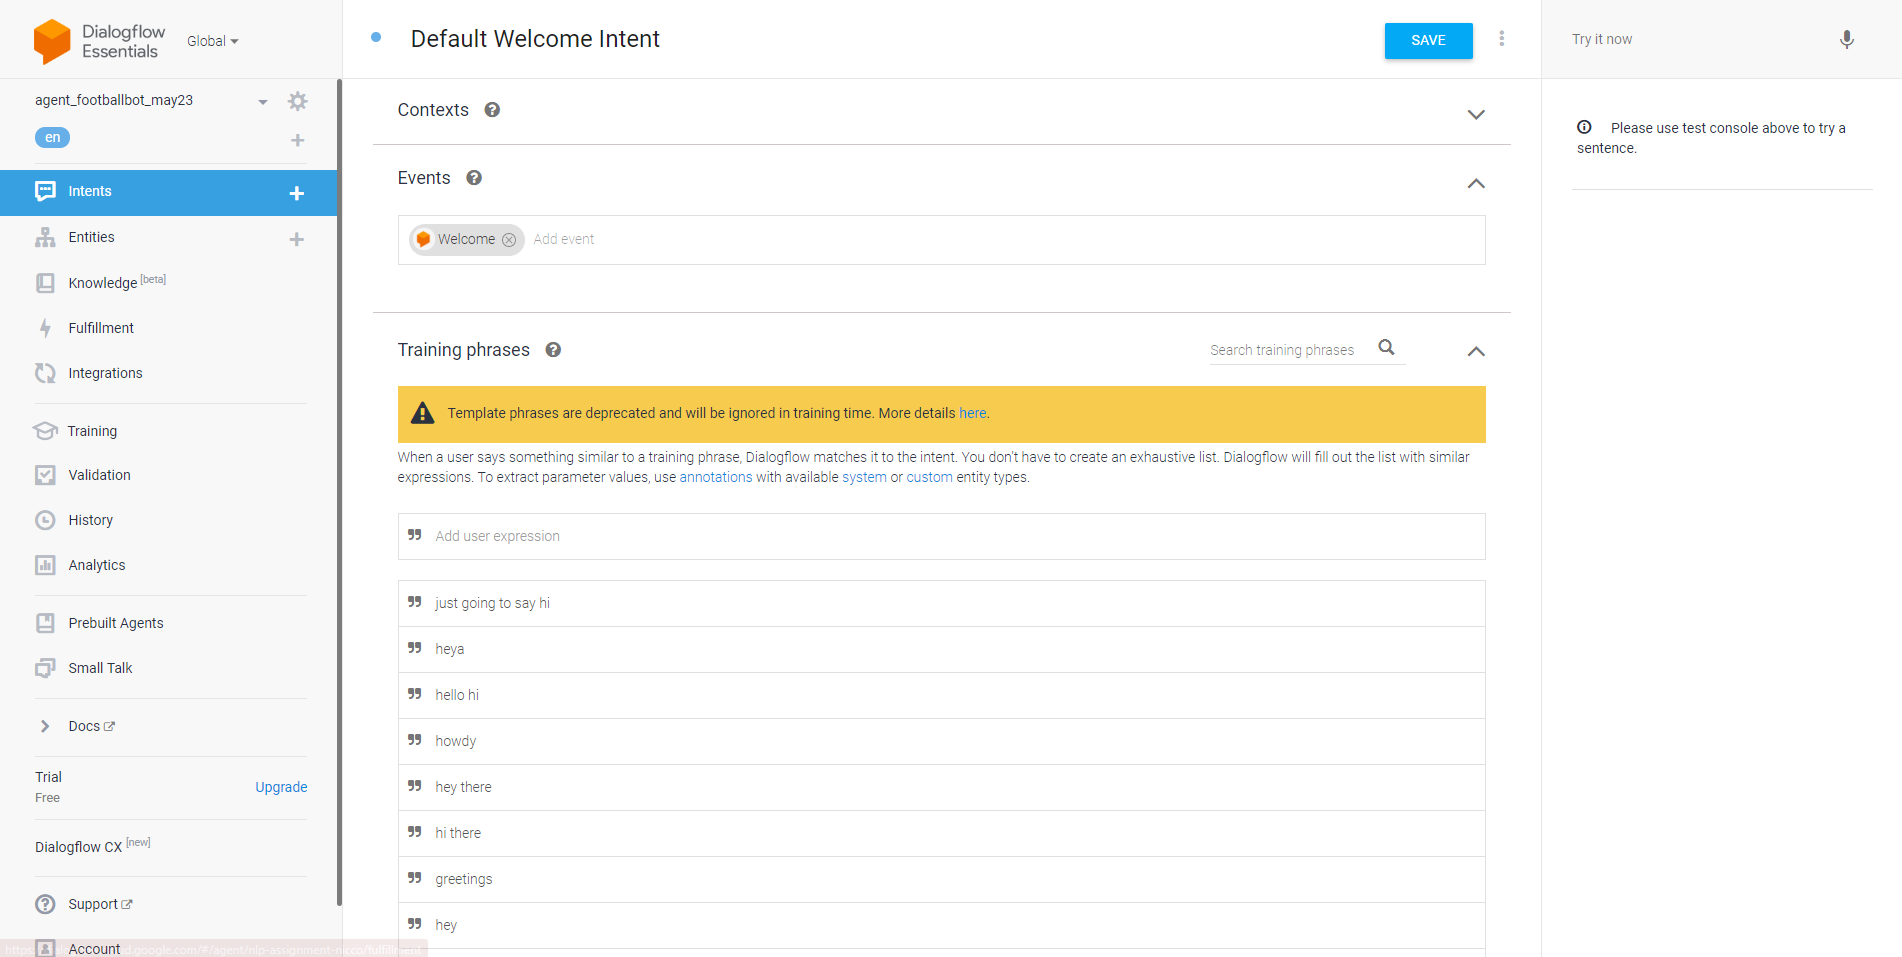
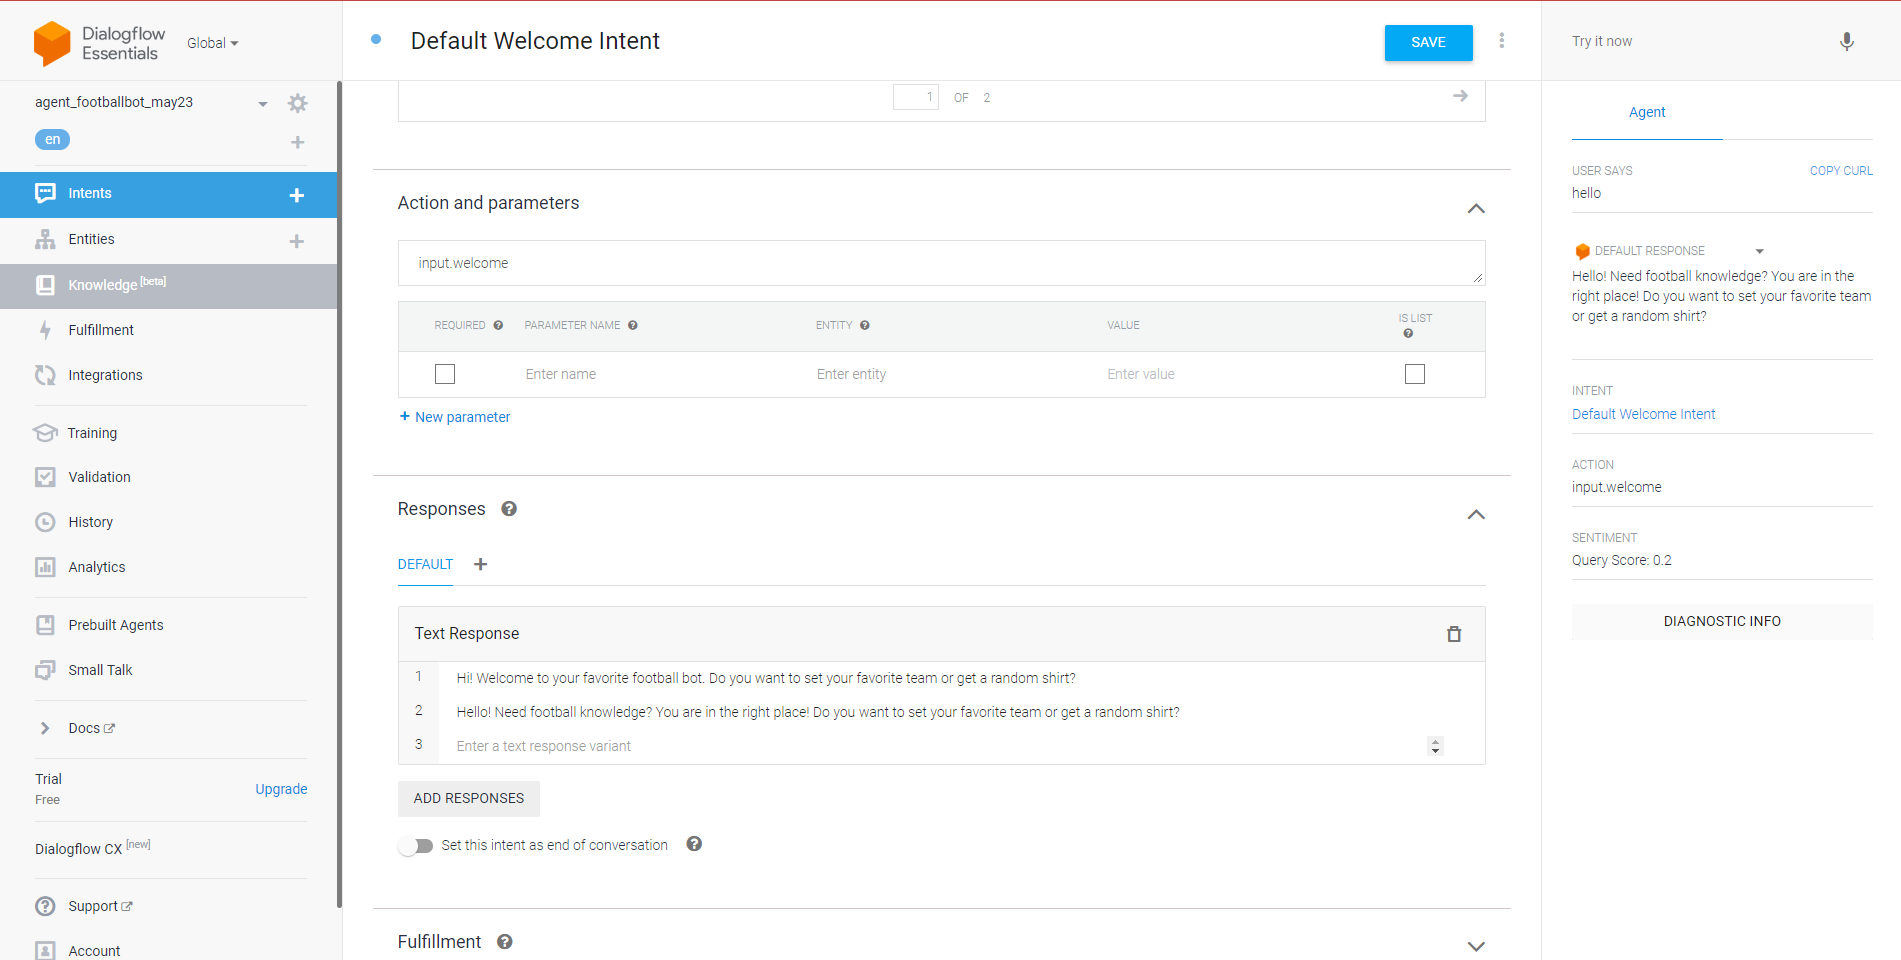

###Authentication
In order to connect to Dialogflow, we will need to authenticate ourselves using some credentials that have been saved in our drive. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file('/content/drive/My Drive/Colab Notebooks/NLP/nlp-assignment-nicco-fa3f3cbc0121.json')

### Session 
A session represents a conversation between a Dialogflow agent and an end-user. You create a session at the beginning of a conversation and use it for each turn of the conversation. Once the conversation has ended, you discontinue using the session. We will create one now.

In [ ]:
session_id = uuid.uuid4().hex
project_id = "nlp-assignment-nicco"
language_code = 'en'

In [ ]:
#create the session client with the credentials
session_client = dialogflow.SessionsClient(credentials=credentials)

session = session_client.session_path(project_id, session_id)

# Front-end
We are going to integrate our model with a front-end, based in Gradio. Gradio enables data scientists and developers to build interactive apps in order to test out your ML projects.

In [ ]:
import gradio as gr
import random
import time

## First MVP
The first MVP to check our one-language model

In [ ]:
def dialogflow_request(text, language_code):
    text_input = dialogflow.TextInput(text=text, language_code=language_code)
    query_input = dialogflow.QueryInput(text=text_input)
    response = session_client.detect_intent(
        request={"session": session, "query_input": query_input}
    )
    return response

In [ ]:
with gr.Blocks() as demo:
    chatbot = gr.Chatbot()
    msg = gr.Textbox()
    clear = gr.Button("Clear")

    def respond(message, chat_history):
        #We add our function
        response = dialogflow_request(message, 'en')
        #We get the answer from the response of Dialogflow
        bot_message = str(response.query_result.fulfillment_messages[0].text.text[0])
        chat_history.append((message, bot_message))
        time.sleep(1)
        return "", chat_history

    msg.submit(respond, [msg, chatbot], [msg, chatbot])
    clear.click(lambda: None, None, chatbot, queue=False)

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

### Translation API
In order to make our model viable in various different languages we are going to use the Google Transalation API

In [ ]:
def translator(message, target_language='en'):
  # Translate the message to english
  translate_client = translate.Client(credentials=credentials)

  if isinstance(message, bytes):
    message = message.decode("utf-8")

  result = translate_client.translate(message, target_language=target_language)
  # Variable to save the user's language
  user_language = result["detectedSourceLanguage"]

  # Variable to save the translated message
  message_translated = result["translatedText"]

  return user_language, message_translated


message = 'ciao'
translated_message = translator(message)

## Second MVP 
For our second MVP we are going to have a more complex and complete architecture like the one shown in the diagram: 
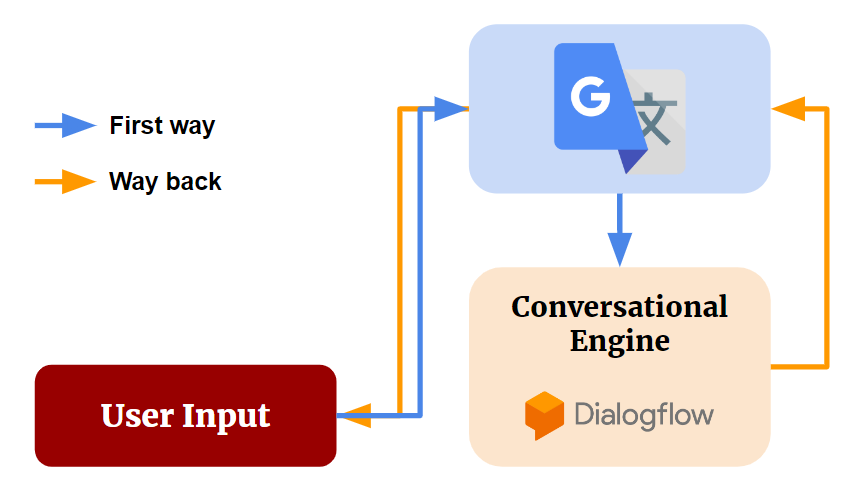

In [15]:
with gr.Blocks() as demo:
    chatbot = gr.Chatbot()
    msg = gr.Textbox()
    clear = gr.Button("Clear")

    def respond(message, chat_history):
        # Translate the message to English and save the user's language
        translator_message = translator(message)
        user_language = translator_message[0]
        message_translated = translator_message[1]

        #We add our function
        response = dialogflow_request(message_translated, 'en')
        #We get the answer from the response of Dialogflow
        bot_message = str(response.query_result.fulfillment_messages[0].text.text[0])
        # Translate the message to the user's language
        bot_message_translator = translator(bot_message, user_language)
        bot_message_translated = bot_message_translator[1]

        chat_history.append((message, bot_message_translated))
        time.sleep(1)
        return "", chat_history

    msg.submit(respond, [msg, chatbot], [msg, chatbot])
    clear.click(lambda: None, None, chatbot, queue=False)

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>